In [2]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
from pyne import serpent
from pyne import nucname

det0 = serpent.parse_det('../spectrum/tap_spectrum_bol_det0.m')

det10 = serpent.parse_det('../spectrum/tap_spectrum_eol_20_det0.m')
det5 = serpent.parse_det('../spectrum/tap_spectrum_eol_5_det0.m')

energy_grid = det0['DETavrgE']
spectrum_grid = det0['DETavrg']
spectrum_grid2 = det10['DETavrg']
spectrum_grid5 = det5['DETavrg']
energy = energy_grid[:,2]
flux_spectrum = spectrum_grid[:,10]

/home/andrei2/anaconda3/lib/python3.5/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)


# Capture cross section read (Xe135,I135)

In [3]:
file_data_xe = np.genfromtxt("load_follow_0-100-0/100-2w-0-4d/tap100_0_100/spectrum/xe135_nc.txt", usecols=(0,1), skip_header=11, skip_footer=2, dtype=float)
file_data_i = np.genfromtxt("load_follow_0-100-0/100-2w-0-4d/tap100_0_100/spectrum/i135_nc.txt", usecols=(0,1), skip_header=11, skip_footer=2, dtype=float)

energy_grid_xe = np.array(file_data_xe[:,0])
energy_grid_i = np.array(file_data_i[:,0])
xe_capture_xs = np.array(file_data_xe[:,1])
i_capture_xs =  np.array(file_data_i[:,1])

OSError: load_follow_0-100-0/100-2w-0-4d/tap100_0_100/spectrum/xe135_nc.txt not found.

<IPython.core.display.Javascript object>


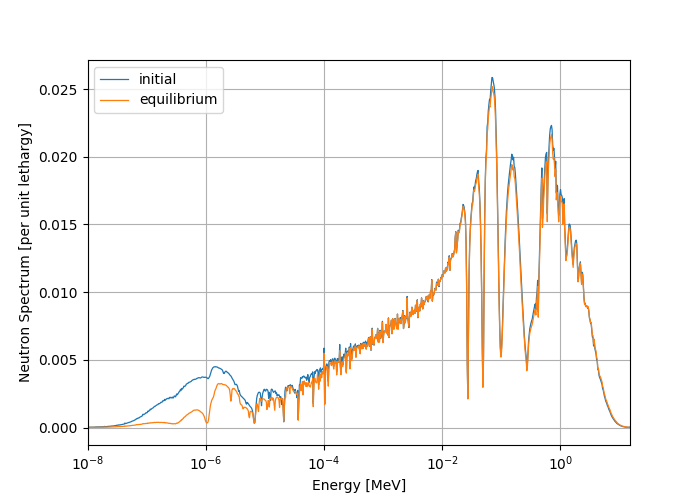

In [4]:
# Initialize figure
fig_1 = matplotlib.pyplot.figure(1, figsize=[7,5])
ax1 = fig_1.add_subplot(111)
ax1.grid(True)
ax1.set_xlabel('Energy [MeV]')
ax1.set_ylabel('Neutron Spectrum [per unit lethargy]') #, color='b', fontsize=14)
ax1.tick_params('y') #, colors='b')
#ax.set_ylim(0,1.6E+21)
ax1.set_xlim(1e-8,15)
ax1.semilogx(energy, spectrum_grid[:,10]/np.sum(energy), '-', label='initial', linewidth=0.9)
#ax1.semilogx(energy, spectrum_grid2[:,10]/np.sum(energy), '-', label='equilibrium (19.79% LEU feed)', linewidth=1.2)
ax1.semilogx(energy, spectrum_grid5[:,10]/np.sum(energy), '-', label='equilibrium', linewidth=0.9)

ax1.legend(loc=0)

#ax2=ax1.twinx()
#ax2.loglog(energy_grid_xe, xe_capture_xs, '-', color='r',label='Xe135')
#ax2.loglog(energy_grid_i, i_capture_xs, '-', color='green',label='I135')
#ax2.set_ylabel('Capture cross-section [b]', color='r', fontsize=14)
#ax2.tick_params('y', colors='r')
#ax2.set_xlim(1e-10,12)
#ax2.legend(loc=7)
#ax1.set_title('Neutron spectrum normalized per unit lethargy for \n PWR/TAP vs posions capture cross-section\n')

fig_1.show()
#fig_1.savefig('/home/andrei2/Desktop/git/meitner-task-2/doc/2019-06-q4-report/figures/spectrum.png',bbox_inches='tight', dpi=700)